In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, ccf, grangercausalitytests
from statsmodels.tsa.api import VAR


locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
df = pd.read_csv('../data/df_analise.csv').set_index('Data')
df.index = pd.to_datetime(df.index, format='%b/%Y')
df = df.asfreq(pd.infer_freq(df.index))

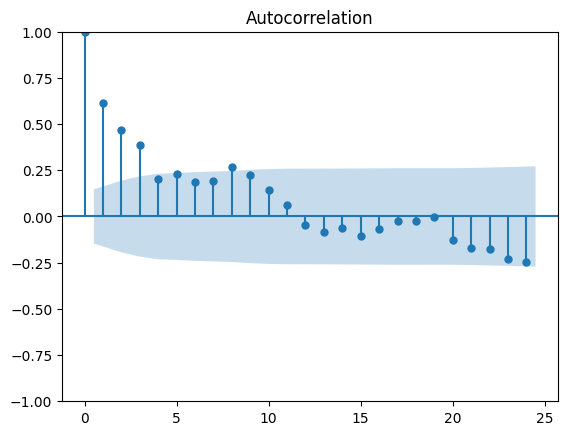

In [2]:
plot_acf(x=df['IGPDI'], lags=24)
plt.show()

In [3]:
result_adfuller = adfuller(df['IGPDI'], autolag='AIC')
print('Stationary: ' + str(result_adfuller[1] < 0.05))

Stationary: True


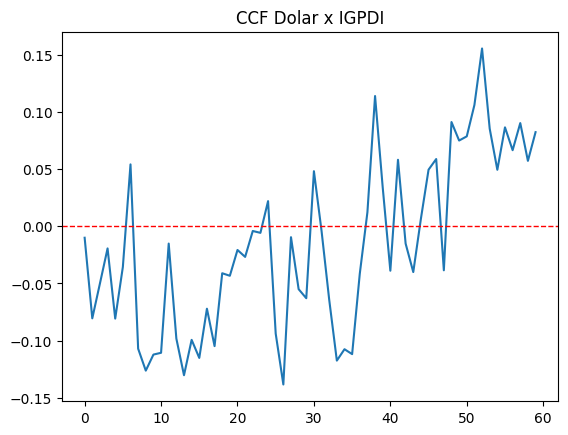

In [4]:
result_ccf = ccf(df['Dolar'], df['IGPDI'], adjusted=True)[:60]
plt.plot(result_ccf, label='ccf')
plt.title('CCF Dolar x IGPDI')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

In [5]:
model = VAR(df[['Dolar', 'IGPDI']])
lag_order = model.select_order(maxlags=24)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,2.920,2.960,18.55,2.936
1,2.433,2.550*,11.39,2.480*
2,2.455,2.651,11.64,2.534
3,2.499,2.774,12.17,2.610
4,2.460,2.814,11.71,2.604
5,2.462,2.894,11.74,2.638
6,2.451,2.962,11.61,2.659
7,2.452,3.041,11.63,2.691
8,2.429*,3.096,11.36*,2.700
9,2.477,3.223,11.94,2.780


In [6]:
result_var = model.fit(maxlags=8)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           ter, 29, abr, 2025
Time:                     15:23:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.02458
Nobs:                     171.000    HQIC:                   2.65338
Log likelihood:          -656.470    FPE:                    11.0369
AIC:                      2.39992    Det(Omega_mle):         9.13108
--------------------------------------------------------------------
Results for equation Dolar
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.233602         0.502998            2.453           0.014
L1.Dolar        -0.033145         0.079997           -0.414           0.679
L1.IGPDI        -0.470330         0.536106           -0.877           0.380
L2.D

In [13]:
cause = result_var.test_causality('IGPDI', 'Dolar', kind='f')
cause.summary()

Test statistic,Critical value,p-value,df
3.099,1.969,0.002,"(8, 308)"


In [8]:
g = grangercausalitytests(x=df[['Dolar', 'IGPDI']], maxlag=8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1487  , p=0.2853  , df_denom=175, df_num=1
ssr based chi2 test:   chi2=1.1683  , p=0.2797  , df=1
likelihood ratio test: chi2=1.1645  , p=0.2805  , df=1
parameter F test:         F=1.1487  , p=0.2853  , df_denom=175, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5682  , p=0.5676  , df_denom=172, df_num=2
ssr based chi2 test:   chi2=1.1694  , p=0.5573  , df=2
likelihood ratio test: chi2=1.1655  , p=0.5584  , df=2
parameter F test:         F=0.5682  , p=0.5676  , df_denom=172, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4158  , p=0.7419  , df_denom=169, df_num=3
ssr based chi2 test:   chi2=1.2992  , p=0.7293  , df=3
likelihood ratio test: chi2=1.2944  , p=0.7305  , df=3
parameter F test:         F=0.4158  , p=0.7419  , df_denom=169, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5329  , p=0.7118  

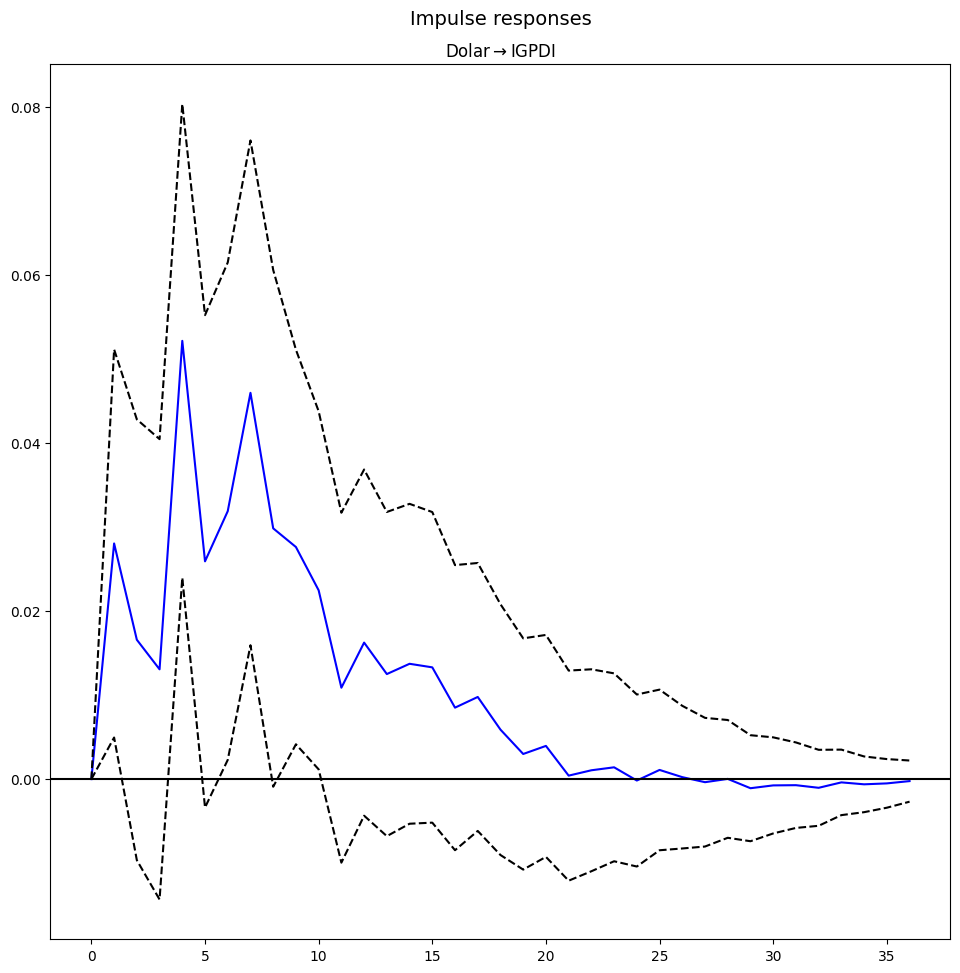

In [9]:
irf = result_var.irf(36)
irf.plot(impulse='Dolar', response='IGPDI')
plt.show()

In [10]:
dolar_index = 0
x_index = 1

# Respostas de x a choques no Dólar
response_x_to_dolar = irf.orth_irfs [:, dolar_index, x_index]

for month, value in enumerate(response_x_to_dolar):
    print(f"Mês {month}: {value:.5f}")

Mês 0: 0.00000
Mês 1: -0.31312
Mês 2: -0.12046
Mês 3: 0.17882
Mês 4: -0.35449
Mês 5: -0.32352
Mês 6: 0.68911
Mês 7: -0.04203
Mês 8: -0.33410
Mês 9: -0.11676
Mês 10: -0.41954
Mês 11: -0.10944
Mês 12: 0.05280
Mês 13: -0.11760
Mês 14: 0.02381
Mês 15: -0.04230
Mês 16: -0.02941
Mês 17: -0.00236
Mês 18: -0.09513
Mês 19: -0.01708
Mês 20: -0.04283
Mês 21: -0.05357
Mês 22: 0.02383
Mês 23: -0.02291
Mês 24: 0.00675
Mês 25: 0.02565
Mês 26: -0.01905
Mês 27: 0.00861
Mês 28: -0.00617
Mês 29: -0.01403
Mês 30: 0.00932
Mês 31: -0.00701
Mês 32: 0.00523
Mês 33: 0.00917
Mês 34: -0.00178
Mês 35: 0.00974
Mês 36: 0.00062


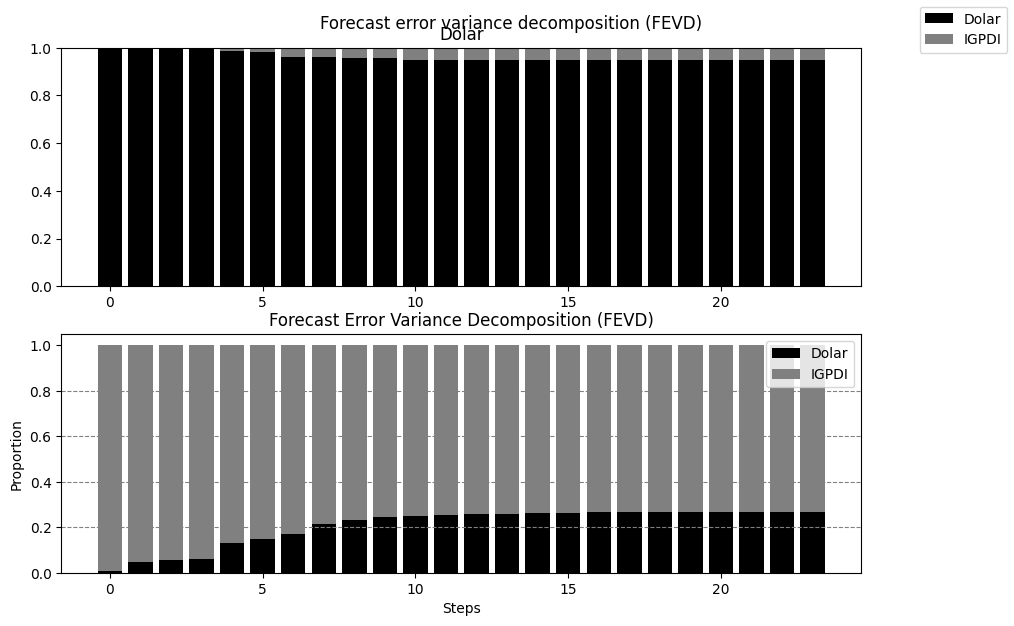

In [12]:
fevd = result_var.fevd(24)

# Plot the FEVD
fevd.plot(figsize=(10, 6))
plt.title("Forecast Error Variance Decomposition (FEVD)")
plt.xlabel("Steps")
plt.ylabel("Proportion")
plt.legend(loc='best')

for level in [0.2, 0.4, 0.6, 0.8]:
    plt.axhline(level, color='gray', linestyle='--', linewidth=0.8)

plt.show()